## Estimate sigma (noise) from the data 

Download data, 'pupil_subjects.csv'
#### https://cp.sync.com/dl/2b8068810#sdeg4xpb-re6bjiwm-dun44hit-ayqmmmg8

Import Python libraries

In [1]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

load all data, create data frame with variables of interest

In [2]:
sdata = pd.read_csv('pupil_subjects.csv')
d = pd.DataFrame()
d['response'] = sdata['response'] # 1 up, 0 down
d['coh_dir'] = sdata['coherence'] / np.sign(sdata['stimulus'] - 0.5) # adds direction 1,-1

Predictor 1 is 'coherence'<br>
The dependent variable is the binary response

In [3]:
x = np.array(d['coh_dir']) # coherence from neg to pos (coh_dir)
y = np.array(d['response']) # up responses

Fit a binomial Probit function to the up responses.
Probit is related to the normal distributions we are generating for the noise added to the DV.

In [4]:
sm_probit_Link = sm.genmod.families.links.probit
glm_binom = sm.GLM(y, sm.add_constant(x), family=sm.families.Binomial(link=sm_probit_Link))
glm_result = glm_binom.fit() # USE PROBIT!

sigma = np.round(1/glm_result.params[1],2) # first is constant, second is predictor 1
print(sigma)

0.13


#### Plot psychometric curve   

<IPython.core.display.Javascript object>


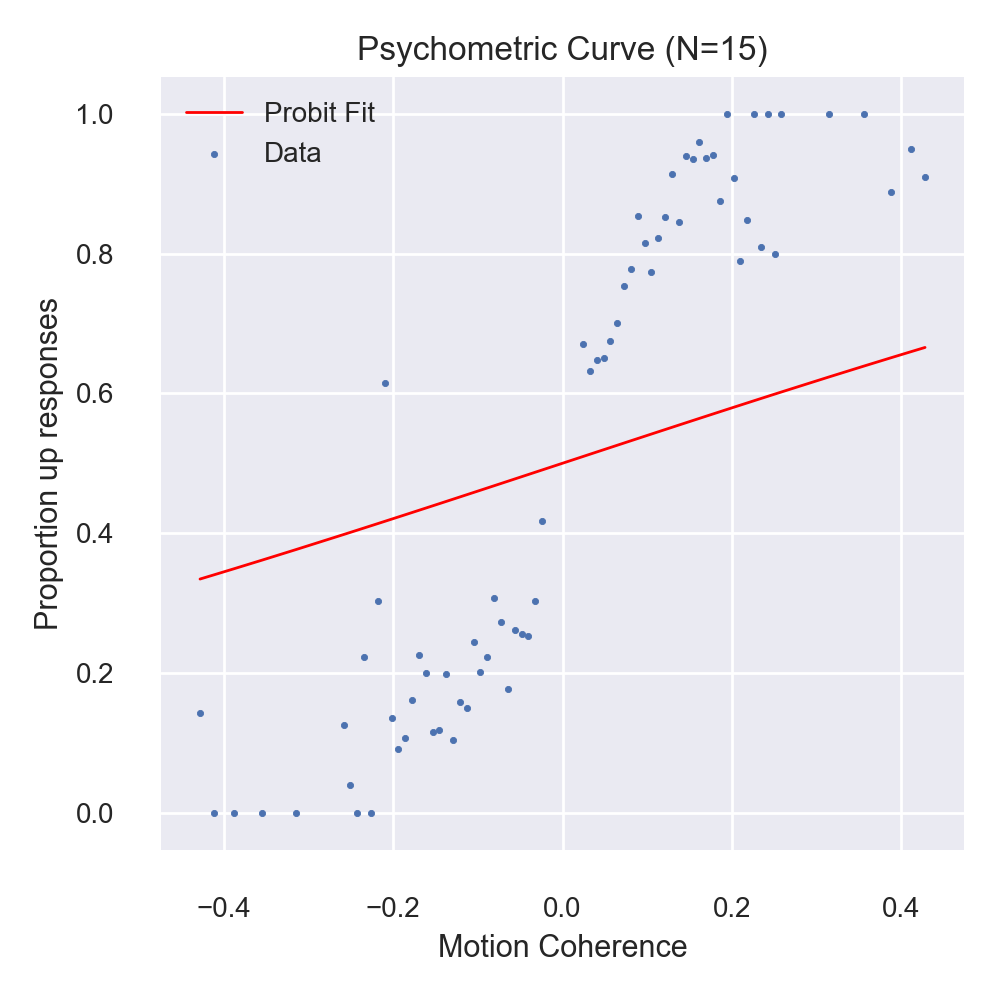

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

# grouped for plotting
grouped = d.groupby(['coh_dir'])['response'].mean()        
grouped = grouped.reset_index()

xg = np.array(grouped['coh_dir'])
yg = np.array(grouped['response'])

ax.scatter(xg,yg,s=5, label='Data')
ax.plot(xg, stats.norm.cdf(xg), linewidth=1, color='red', label='Probit Fit')
ax.legend(loc='upper left');
ax.set_ylabel('Proportion up responses')
ax.set_xlabel('Motion Coherence')
ax.set_title('Psychometric Curve (N=15)')

sns.despine(offset=10, trim=True)
plt.tight_layout()
# fig.savefig('psychometric_curve.pdf')
plt.show()